In [1]:
import sys
sys.path.insert(0, 'pipeline_code')
from mixed_data import create_pipeline
from cross_validation import Stratified10KFoldValidation
import pandas as pd

In [2]:
file = pd.read_csv("datasets/Titanic-Dataset.csv")
file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
from sklearn.model_selection import train_test_split

data, labels = file.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Survived"]), file.Survived.astype("category")
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=0, stratify=labels)

train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((712, 7), (179, 7), (712,), (179,))

In [4]:
numeric_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']
ordinal_columns = {'cat__Pclass': ['1.0', '2.0', '3.0'], \
                    'cat__SibSp': ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '8.0'], \
                    'cat__Parch': ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0']}

param_grid_RandomForest = {
    "feature_selector__k": range(1, 7),
    
    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    
    "model__estimator__max_depth": range(2, 8),
    "model__estimator__criterion": ["gini", "entropy"],
}

param_grid_KNNeighbor = {
    "feature_selector__k": range(1, 7),
    
    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    
    "model__n_neighbors": range(3, 18, 2),
}

param_grid_AdaBoostGNB = {
    "feature_selector__k": range(1, 7),
    
    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    
    "model__learning_rate": [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5],
}

param_grid_NeuralNetwork = {
    "feature_selector__k": range(1, 7),

    "oversampler__k_neighbors": range(3, 10, 2),
    "oversampler__borderline": [True, False],
    
    "model__hidden_layer_sizes": [(32,), (32, 32, ), (64,), (64, 64, )],
    "model__activation": ["relu", "logistic"],
    "model__learning_rate": ['adaptive', 'constant']
}

In [5]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import RobustScaler

clf_RandomForest = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        target=labels,
        model="RandomForestClf"
    )

clf_KNNeighbor = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        target=labels,
        model="KNNClf"
    )

clf_AdaBoostGNB = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        target=labels,
        model="AdaBoostGaussianNB"
    )

clf_NeuralNetwork = create_pipeline(
        numerical_features=numeric_features,
        categorical_features=categorical_features,
        ordinal_columns=ordinal_columns,
        imputers_needed=True,
        scaler=RobustScaler(),
        oversample_needed=True,
        target=labels,
        model="NeuralNetworkClf"
    )

In [7]:
clf_NeuralNetwork

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   CustomKNNImputer(train_labels=0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1])),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   CustomSimpleImputer(train_labels=0      0
1      1
2      1
3      1
4      0
      ....
                                                   'SibSp', 'Parch'])])),
                ('feature_selector', MutualInfoFeatureSelector()),
                ('oversampler', SMOTE_ENC(sampling_strategy='minority')),
                ('encoder',
                 DynamicColumnEncoder(ordinal_columns={'cat__Parch': ['0.0',
                                                                      '1.0',
                                                                      '2.0',
                                                                      '3.0',
                                                                      '4.0',
                                                                      '5.0',
                                                                      '6.0'],
                                                       'cat__Pclass': ['1.0',
                                                                       '2.0',
                                                                       '3.0'],
                                                       'cat__SibSp': ['0.0',
                                                                      '1.0',
                                                                      '2.0',
                                                                      '3.0',
                                                                      '4.0',
                                                                      '5.0',
                                                                      '8.0']})),
                ('model', MLPClassifier(random_state=0))])

In [8]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
scorer = "f1_macro"

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        44
           1       0.85      0.79      0.81        28

    accuracy                           0.86        72
   macro avg       0.86      0.85      0.85        72
weighted avg       0.86      0.86      0.86        72

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.89      0.86      0.87        28

    accuracy                           0.90        72
   macro avg       0.90      0.89      0.90        72
weighted avg       0.90      0.90      0.90        72

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        44
           1       0.91      0.78      0.84        27

    accuracy                           0.89        71
   macro avg       0.89      0.87      0.88        71
weighted avg       0.89      0.89      0.89        71

              preci

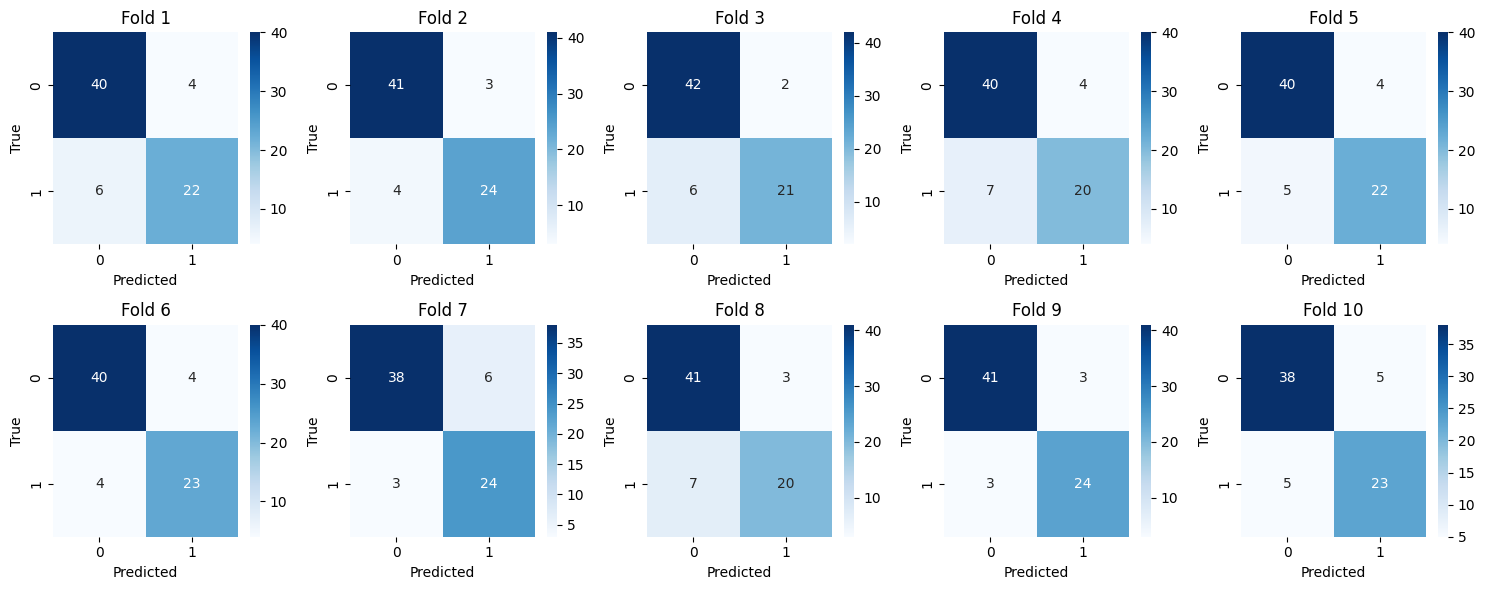

Model best parameters: {'oversampler__k_neighbors': 9, 'oversampler__borderline': False, 'model__estimator__max_depth': 6, 'model__estimator__criterion': 'gini', 'feature_selector__k': 3}


In [9]:
f_macro_scores1 = []
clfRF, best_params, reports = \
    Stratified10KFoldValidation(clf_RandomForest, param_grid_RandomForest, train_data, train_labels, scorer, skf)
print("Model best parameters:", best_params)
for report in reports:
    f_macro_scores1.append(report["macro avg"]["f1-score"])

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        44
           1       0.71      0.79      0.75        28

    accuracy                           0.79        72
   macro avg       0.78      0.79      0.78        72
weighted avg       0.80      0.79      0.79        72

              precision    recall  f1-score   support

           0       0.89      0.70      0.78        44
           1       0.65      0.86      0.74        28

    accuracy                           0.76        72
   macro avg       0.77      0.78      0.76        72
weighted avg       0.79      0.76      0.77        72

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        44
           1       0.77      0.89      0.83        27

    accuracy                           0.86        71
   macro avg       0.85      0.86      0.85        71
weighted avg       0.87      0.86      0.86        71

              preci

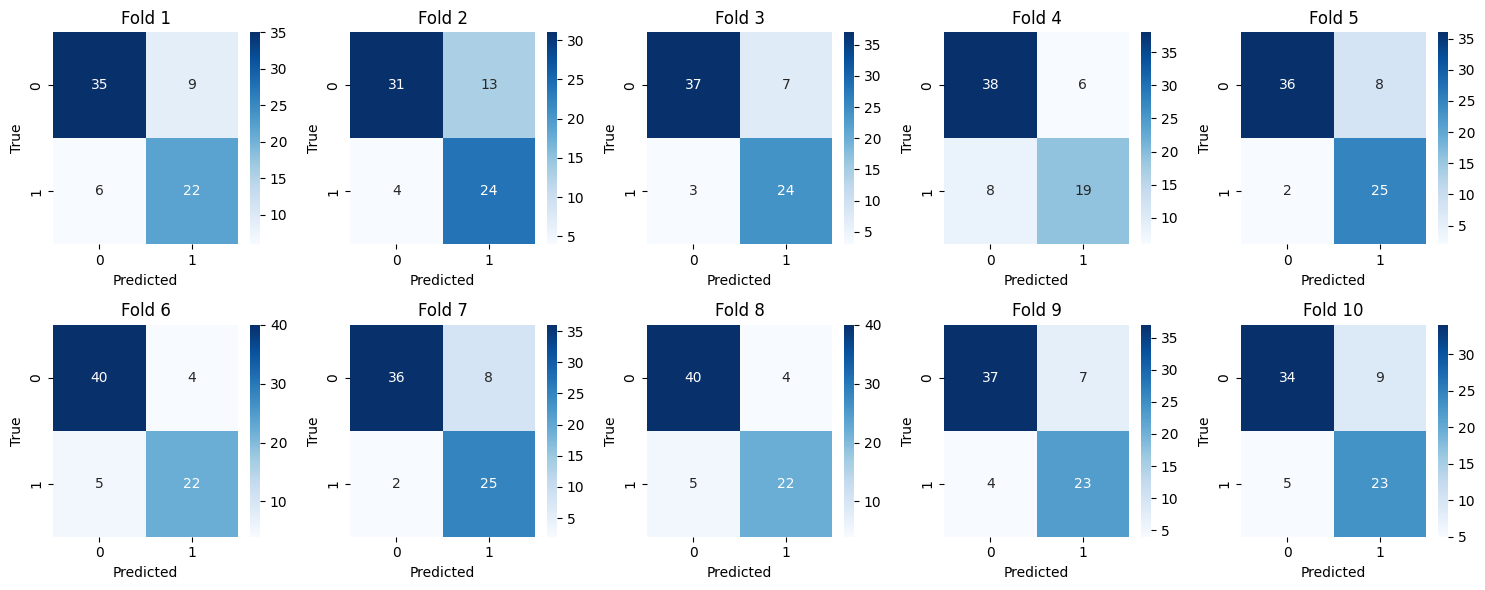

Model best parameters: {'oversampler__k_neighbors': 3, 'oversampler__borderline': False, 'model__n_neighbors': 15, 'feature_selector__k': 5}


In [10]:
f_macro_scores2 = []
clfKNN, best_params, reports = \
    Stratified10KFoldValidation(clf_KNNeighbor, param_grid_KNNeighbor, train_data, train_labels, scorer, skf)
print("Model best parameters:", best_params)
for report in reports:
    f_macro_scores2.append(report["macro avg"]["f1-score"])

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        44
           1       0.67      0.57      0.62        28

    accuracy                           0.72        72
   macro avg       0.71      0.69      0.70        72
weighted avg       0.72      0.72      0.72        72

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        44
           1       0.80      0.71      0.75        28

    accuracy                           0.82        72
   macro avg       0.81      0.80      0.81        72
weighted avg       0.82      0.82      0.82        72

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        44
           1       0.73      0.70      0.72        27

    accuracy                           0.79        71
   macro avg       0.78      0.77      0.77        71
weighted avg       0.79      0.79      0.79        71

              preci

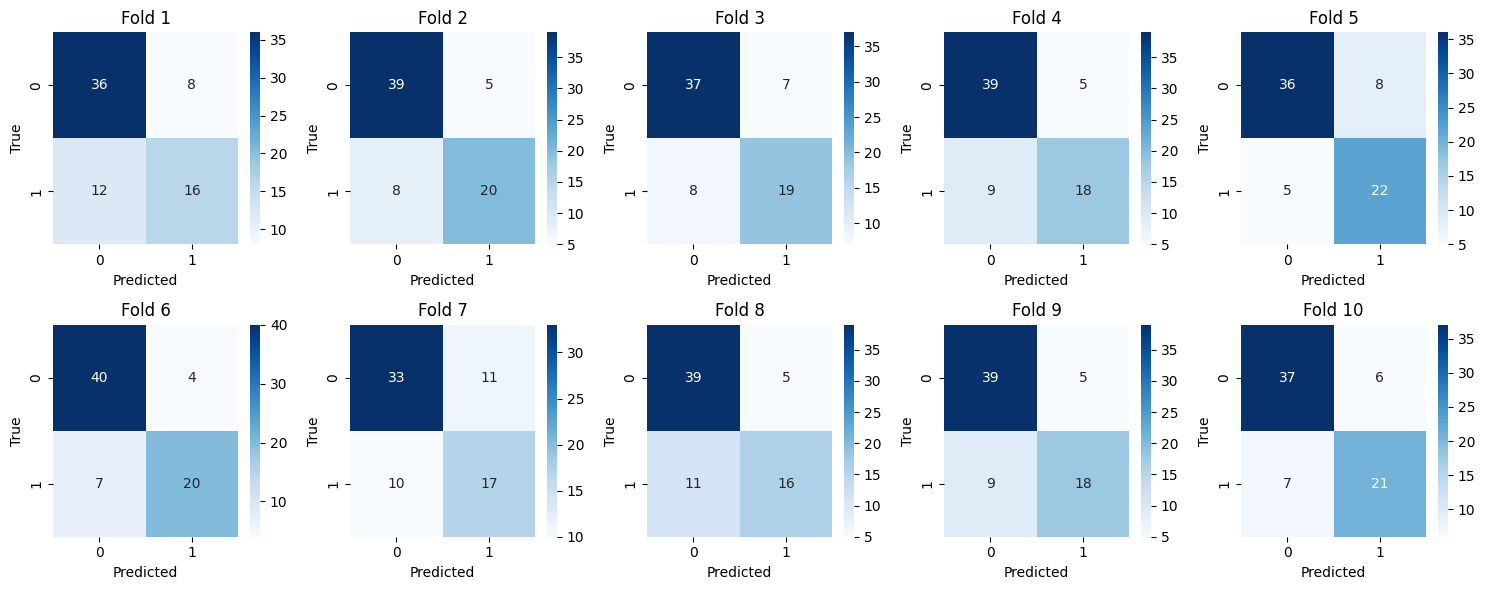

Model best parameters: {'oversampler__k_neighbors': 3, 'oversampler__borderline': False, 'model__learning_rate': 1.4, 'feature_selector__k': 1}


In [11]:
f_macro_scores3 = []
clfADAGNB, best_params, reports = \
    Stratified10KFoldValidation(clf_AdaBoostGNB, param_grid_AdaBoostGNB, train_data, train_labels, scorer, skf)
print("Model best parameters:", best_params)
for report in reports:
    f_macro_scores3.append(report["macro avg"]["f1-score"])

c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.84      0.87        44
           1       0.77      0.86      0.81        28

    accuracy                           0.85        72
   macro avg       0.84      0.85      0.84        72
weighted avg       0.85      0.85      0.85        72

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.69      0.86      0.76        28

    accuracy                           0.79        72
   macro avg       0.79      0.80      0.79        72
weighted avg       0.81      0.79      0.79        72

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.81      0.93      0.86        27

    accuracy                           0.89        71
   macro avg       0.88      0.89      0.88        71
weighted avg       0.90      0.89      0.89        71

              preci

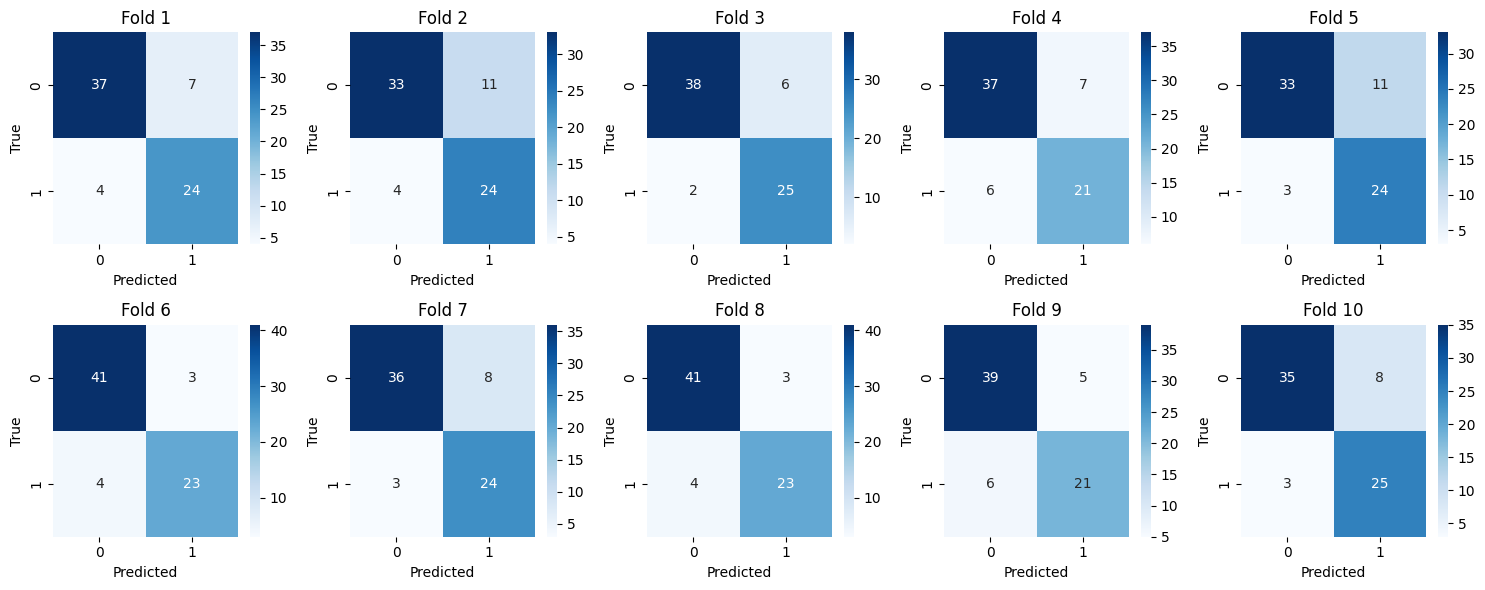

Model best parameters: {'oversampler__k_neighbors': 5, 'oversampler__borderline': True, 'model__learning_rate': 'adaptive', 'model__hidden_layer_sizes': (32, 32), 'model__activation': 'relu', 'feature_selector__k': 5}


In [12]:
f_macro_scores4 = []
clfNN, best_params, reports = \
    Stratified10KFoldValidation(clf_NeuralNetwork, param_grid_NeuralNetwork, train_data, train_labels, scorer, skf)
print("Model best parameters:", best_params)
for report in reports:
    f_macro_scores4.append(report["macro avg"]["f1-score"])

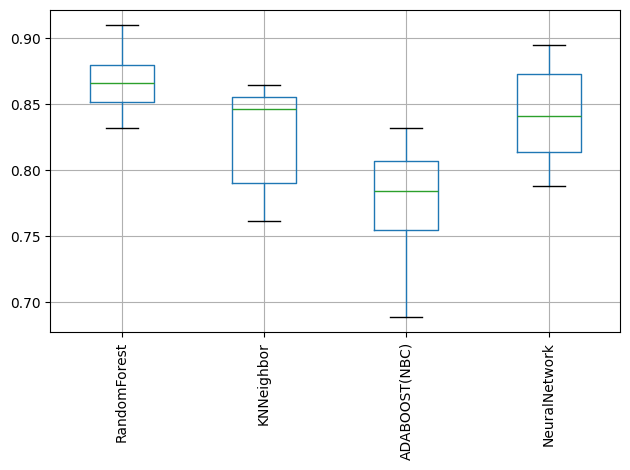

In [13]:
cv_scores = {
    'RandomForest': f_macro_scores1,
    'KNNeighbor': f_macro_scores2,
    'ADABOOST(NBC)': f_macro_scores3,
    'NeuralNetwork': f_macro_scores4,
}

df_cv_scores = pd.DataFrame(cv_scores)

df_cv_scores.boxplot()
plt.xticks(ticks=range(1, len(df_cv_scores.columns) + 1), labels=df_cv_scores.columns, rotation=90)
plt.tight_layout()
plt.show()